# A/B Testing

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

In [2]:
df = pd.read_csv("data/Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Learning 1: Query
Using query instead of conditional logic to filter data

In [5]:
# Female with partners
df_female_partners = df.query('gender=="Female" and Partner=="Yes"')

# Female with dependents
df_female_dependents = df.query('gender=="Female" and Dependents=="Yes"')

# Female with partners or with dependents
df_female = df.query('(gender=="Female" and Partner=="Yes") or (gender=="Female" and Dependents=="Yes")')

print("female with partners ",len(df_female_partners.index))
print("female with dependents ",len(df_female_dependents.index))
print("female with partners and dependents ",len(df_female.index))

female with partners  1688
female with dependents  1028
female with partners and dependents  1833


## Learning 2: Data Cleansing
Identifying missing and duplicated values

In [8]:
# Identify total rows
print(df.shape[0])

# Identify unique ID
print(df.customerID.nunique())

7043
7043


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

The data seems not to contain any duplicates nor missing values. Either way, here's the query for duplication diagnostic and identifying missing values by rows. 

### Missing values by rows

In [13]:
sum(df.isnull().sum(axis=1)>0)

0

### Duplicate values

In [14]:
# count number of ID with duplicates
sum(df.customerID.duplicated())

0

In [15]:
# show list of all duplicated IDs
df[df.duplicated(['customerID'], keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
# show unique IDs by keeping only the first ID when there is duplicates
df[~df.customerID.duplicated(keep='first')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Learning 3: Creating random binomial

1000


(array([ 11.,  30.,  97., 148., 206., 252., 133.,  86.,  27.,  10.]),
 array([ 68. ,  72.4,  76.8,  81.2,  85.6,  90. ,  94.4,  98.8, 103.2,
        107.6, 112. ]),
 <a list of 10 Patch objects>)

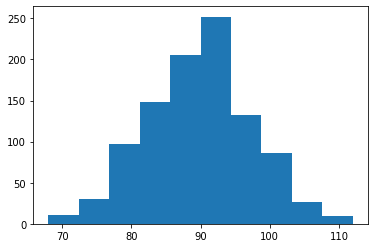

In [21]:
numTrials = 300 
probSuccess = 0.3
numIteration = 1000
rand1 =  np.random.binomial(numTrials,probSuccess,numIteration)
print(len(rand1))
plt.hist(rand1)

## Learning 4: Statsmodel
This library will help simulate z-test and p-value. `TODO:` read more on these 2 variable. What it infers? How to interpret it's value? How to calculate it?

### p-value

The proportion of the p_diffs (difference of probability between treatement and control from simulated binomial trials) that are greater than the actual difference observed is called the p-value

A p-value is the probability of observing your statistic if the null hypothesis is true.

### z-test
Link to library [here](https://www.statsmodels.org/dev/generated0/statsmodels.stats.proportion.proportions_ztest.html)

In [25]:
import statsmodels.api as sm

convert_control = 200
convert_treatment = 450
number_of_control = 1450
number_of_treatment = 1500
z_score, p_value = sm.stats.proportions_ztest([convert_control, convert_treatment], [number_of_control, number_of_treatment], alternative='smaller')
z_score, p_value

(-10.617442124591863, 1.2362158660304346e-26)

## Learning 5: 